# Model Benchmarking and Selection
This notebook benchmarks multiple ML and DL models on a randomly sampled subset of the dataset. It evaluates models using metrics such as accuracy, recall, precision, F1 score, MCC, MSE, RMSE, and R2, and visualizes confusion matrices. The best model is selected based on these metrics.

In [45]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import joblib
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, mean_squared_error, r2_score, confusion_matrix)

## Load Benchmark Dataset
Load the benchmark dataset for model comparison.

In [46]:
# Load the benchmark dataset
dataset_path = 'DATASET_BENCHMARK_SAMPLE.csv'
sample_df = pd.read_csv(dataset_path)
print(f"Benchmark dataset shape: {sample_df.shape}")
print(f"Label distribution: {sample_df['Label'].value_counts()}")
sample_df.head()

Benchmark dataset shape: (4314, 2)
Label distribution: Label
neutral     1438
positive    1438
negative    1438
Name: count, dtype: int64


,Sentiment,Label
0,siguruwun makapag tau oryentasyon miyembro gag...,neutral
1,school paryu iskwila grade,neutral
2,tandaan pagkopya parirala importante tandaan s...,neutral
3,kanakong rurugan,neutral
4,importante maintindiyan maray binasa itinau,neutral


## Load Models from Folder
Load all ML and DL models and their associated vectorizers/tokenizers for benchmarking.

In [47]:
# Helper functions to load models and vectorizers/tokenizers
def load_pickle(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

def load_joblib(path):
    return joblib.load(path)

def load_keras(path):
    from tensorflow import keras
    return keras.models.load_model(path)

ml_folder = 'ML'
dl_folder = 'DL'

# Only use SVM and LSTM for comparison
ml_models = {
    'SVM': {
        'model': load_joblib(os.path.join(ml_folder, 'SVM_model.obj')),
        'vectorizer': load_joblib(os.path.join(ml_folder, 'SVM_tfidf_vectorizer.obj'))
    }
}
dl_models = {
    'LSTM': {
        'model': load_keras(os.path.join(dl_folder, 'lstm_model.keras')),
        'tokenizer': load_pickle(os.path.join(dl_folder, 'lstm_tokenizer.obj'))
    }
}

c:\Users\Joshua Ean\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Benchmark Models on Sampled Dataset
Use each loaded model to make predictions on the sampled dataset.

In [48]:
# Prepare X and y for benchmarking and run all models
target_col = 'Label'  # Change if your target column is named differently
X_sample = sample_df.drop(columns=[target_col])
y_sample = sample_df[target_col]

# Define DL input preparation function
def prepare_dl_input(tokenizer, texts, maxlen=100):
    sequences = tokenizer.texts_to_sequences(texts)
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    return pad_sequences(sequences, maxlen=maxlen)

print(f"Starting benchmarking with {len(X_sample)} samples")
print(f"Label distribution: {y_sample.value_counts()}")

results = {}

# Benchmark ML models (SVM)
print("\n=== Benchmarking ML Models ===")
for name, items in ml_models.items():
    print(f"Processing {name}...")
    vectorizer = items['vectorizer']
    model = items['model']
    X_vec = vectorizer.transform(X_sample.squeeze().astype(str))
    y_pred = model.predict(X_vec)
    results[name] = {'y_true': y_sample, 'y_pred': y_pred}
    print(f"{name} predictions: {len(y_pred)}")

# Benchmark DL models (LSTM)  
print("\n=== Benchmarking DL Models ===")
for name, items in dl_models.items():
    print(f"Processing {name}...")
    tokenizer = items['tokenizer']
    model = items['model']
    X_seq = prepare_dl_input(tokenizer, X_sample.squeeze().astype(str))
    print(f"X_seq shape: {X_seq.shape}")
    y_pred = model.predict(X_seq)
    print(f"Raw predictions shape: {y_pred.shape}")
    # If output is probabilities, take argmax
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)
    else:
        y_pred = (y_pred > 0.5).astype(int).flatten()
    results[name] = {'y_true': y_sample, 'y_pred': y_pred}
    print(f"{name} final predictions: {len(y_pred)}")

print(f"\nTotal models benchmarked: {len(results)}")
for name in results.keys():
    print(f"{name}: {len(results[name]['y_pred'])} predictions")

Starting benchmarking with 4314 samples
Label distribution: Label
neutral     1438
positive    1438
negative    1438
Name: count, dtype: int64

=== Benchmarking ML Models ===
Processing SVM...
SVM predictions: 4314

=== Benchmarking DL Models ===
Processing LSTM...
X_seq shape: (4314, 100)
SVM predictions: 4314

=== Benchmarking DL Models ===
Processing LSTM...
X_seq shape: (4314, 100)
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step
Raw predictions shape: (4314, 3)
LSTM final predictions: 4314

Total models benchmarked: 2
SVM: 4314 predictions
LSTM: 4314 predictions
Raw predictions shape: (4314, 3)
LSTM final predictions: 4314

Total models benchmarked: 2
SVM: 4314 predictions
LSTM: 4314 predictions


In [49]:
# This cell has been consolidated into the previous cell
# All benchmarking is now done in one place to avoid duplicates

In [50]:
# Define DL input preparation function if not already defined

def prepare_dl_input(tokenizer, texts, maxlen=100):
    sequences = tokenizer.texts_to_sequences(texts)
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    return pad_sequences(sequences, maxlen=maxlen)

In [51]:
# This cell has been consolidated into the main benchmarking cell
# All DL benchmarking is now done in one place to avoid duplicates

## Calculate Metrics: Accuracy, Recall, Precision, F1 Score, MCC, MSE, RMSE, R2
Compute all specified metrics for each model.

In [52]:
# This duplicate cell has been removed
# All benchmarking consolidated to avoid overwriting results

## Display Confusion Matrix Heatmap
Plot a confusion matrix heatmap for each model.


=== SVM Model Analysis ===
Total samples: 4314
True labels distribution: Label
neutral     1438
positive    1438
negative    1438
Name: count, dtype: int64
Predicted labels distribution: neutral     2091
negative    1161
positive    1062
Name: count, dtype: int64
Samples after cleaning: 4314


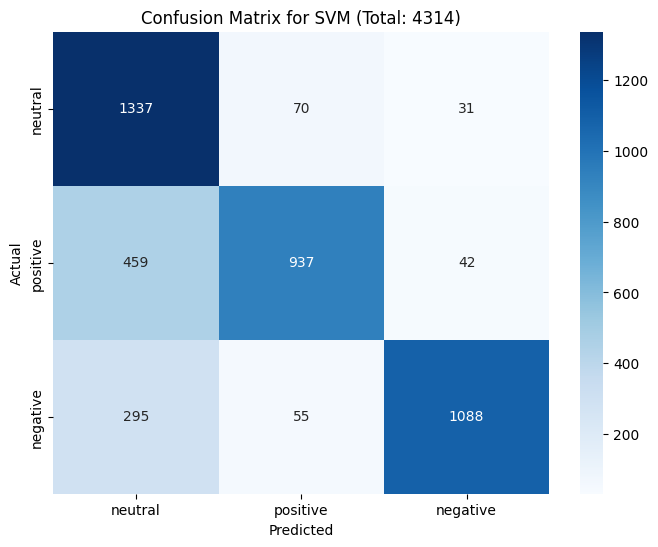

Confusion matrix total: 4314

=== LSTM Model Analysis ===
Total samples: 4314
True labels distribution: Label
neutral     1438
positive    1438
negative    1438
Name: count, dtype: int64
Predicted labels distribution: 2    1653
1    1353
0    1308
Name: count, dtype: int64
Samples after cleaning: 4314


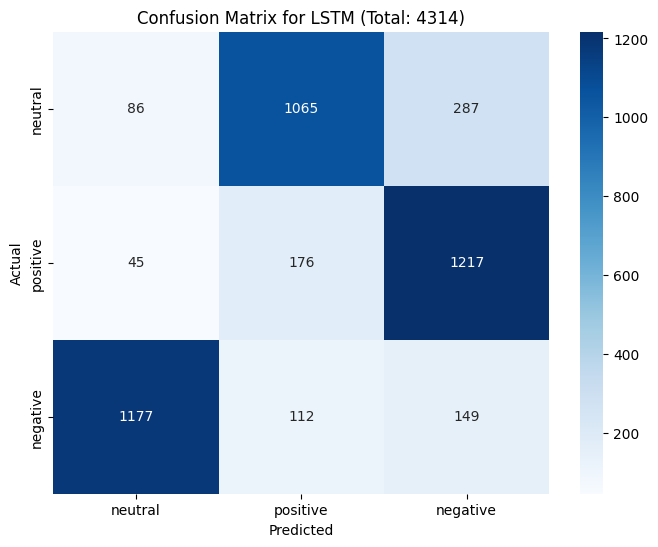

Confusion matrix total: 4314


In [53]:
# Plot confusion matrix heatmap for each model
for name, res in results.items():
    y_true = res['y_true']
    y_pred = res['y_pred']
    
    print(f"\n=== {name} Model Analysis ===")
    print(f"Total samples: {len(y_true)}")
    print(f"True labels distribution: {pd.Series(y_true).value_counts()}")
    print(f"Predicted labels distribution: {pd.Series(y_pred).value_counts()}")
    
    # Map to numerical values for confusion matrix
    label_map = {'neutral': 0, 'positive': 1, 'negative': 2}
    
    # Convert true labels to numerical
    if isinstance(y_true.iloc[0], str):
        y_true_num = pd.Series(y_true).map(label_map)
    else:
        y_true_num = pd.Series(y_true)
    
    # Convert predicted labels to numerical  
    if isinstance(y_pred[0], str):
        y_pred_num = pd.Series(y_pred).map(label_map)
    else:
        y_pred_num = pd.Series(y_pred)
    
    # Remove any NaN values
    mask = (~y_true_num.isna()) & (~y_pred_num.isna())
    y_true_clean = y_true_num[mask]
    y_pred_clean = y_pred_num[mask]
    
    print(f"Samples after cleaning: {len(y_true_clean)}")
    
    # Create confusion matrix with explicit labels
    cm = confusion_matrix(y_true_clean, y_pred_clean, labels=[0, 1, 2])
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['neutral', 'positive', 'negative'], 
                yticklabels=['neutral', 'positive', 'negative'])
    plt.title(f'Confusion Matrix for {name} (Total: {cm.sum()})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f"Confusion matrix total: {cm.sum()}")
    print("="*50)

## Select and Display Best Model Based on Metrics
Compare all models based on the computed metrics and display the best performing model.

In [54]:
# Calculate metrics for each model and select best
label_map = {'neutral': 0, 'positive': 1, 'negative': 2}
metrics = {}
for name, res in results.items():
    y_true = res['y_true']
    y_pred = res['y_pred']
    # Determine if labels are strings or numbers
    if isinstance(y_true.iloc[0], str):
        if not isinstance(y_pred[0], str):
            inv_label_map = {v: k for k, v in label_map.items()}
            y_pred_class = pd.Series(y_pred).map(inv_label_map)
        else:
            y_pred_class = pd.Series(y_pred)
        y_true_class = pd.Series(y_true)
        y_true_num = y_true_class.map(label_map)
        y_pred_num = y_pred_class.map(label_map) if isinstance(y_pred_class.iloc[0], str) else y_pred_class
    else:
        y_true_num = pd.Series(y_true)
        y_pred_num = pd.Series(y_pred)
        y_true_class = y_true_num
        y_pred_class = y_pred_num
    mask = (~y_true_class.isna()) & (~y_pred_class.isna())
    y_true_class = y_true_class[mask]
    y_pred_class = y_pred_class[mask]
    y_true_num = y_true_num[mask]
    y_pred_num = y_pred_num[mask]
    metrics[name] = {
        'Accuracy': accuracy_score(y_true_class, y_pred_class),
        'Recall': recall_score(y_true_class, y_pred_class, average='weighted', zero_division=0),
        'Precision': precision_score(y_true_class, y_pred_class, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_true_class, y_pred_class, average='weighted', zero_division=0),
        'MCC': matthews_corrcoef(y_true_class, y_pred_class),
        'MSE': mean_squared_error(y_true_num, y_pred_num),
        'RMSE': np.sqrt(mean_squared_error(y_true_num, y_pred_num)),
        'R2': r2_score(y_true_num, y_pred_num)
    }
metrics_df = pd.DataFrame(metrics).T
best_model = metrics_df['Accuracy'].idxmax()
print(f"Best model based on Accuracy: {best_model}")
print(metrics_df.loc[best_model])

metrics_df

Best model based on Accuracy: SVM
Accuracy     0.779323
Recall       0.779323
Precision    0.819609
F1 Score     0.781522
MCC          0.687068
MSE          0.447381
RMSE         0.668865
R2           0.328929
Name: SVM, dtype: float64


,Accuracy,Recall,Precision,F1 Score,MCC,MSE,RMSE,R2
SVM,0.779323,0.779323,0.819609,0.781522,0.687068,0.447381,0.668865,0.328929
LSTM,0.095271,0.095271,0.095323,0.095055,-0.358110,1.922809,1.386654,-1.884214
